<img src="images/SDAIA.png" style="float: left; margin: 10px; height: 100px">
<img src="images/METIS.png" style="float: right; margin: 10px; height: 100px">

# MVP: Predicting Cardiovascular Disease with Classification Machine Learning Algorithms

### - Lama Ibrahim Alharbi

<img src="images/heart.jpg" style="float: margin: 10px; height: 350px">

In this project Notebook I will predict presence or absence of cardiovascular disease using the patient examination results by building classification machine learning models to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

In addition, the data found on `kaggle` [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). 

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('cardio.csv',delimiter=';')

In [9]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [25]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [46]:
print("The shape of the dataset is : ", data.shape)

The shape of the dataset is :  (70000, 13)


In [31]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data description

There are 3 types of input features:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

<img src="images/dataset.png" style="float: left; margin: 10px; height: 400px">


## Exploratory Data Analysis

The most important point in working with the data is to understand the it first, then try to find patterns in it by using the visualization because in the real-world, so it’s important to ask why this person particulary affected with `Cardiovascular Disease`?, to answer we need to look deeper to the features and the relationship.

In [11]:
quan_data = list(data.loc[:,data.dtypes != 'object'].columns.values)
quan_data.remove('cardio')

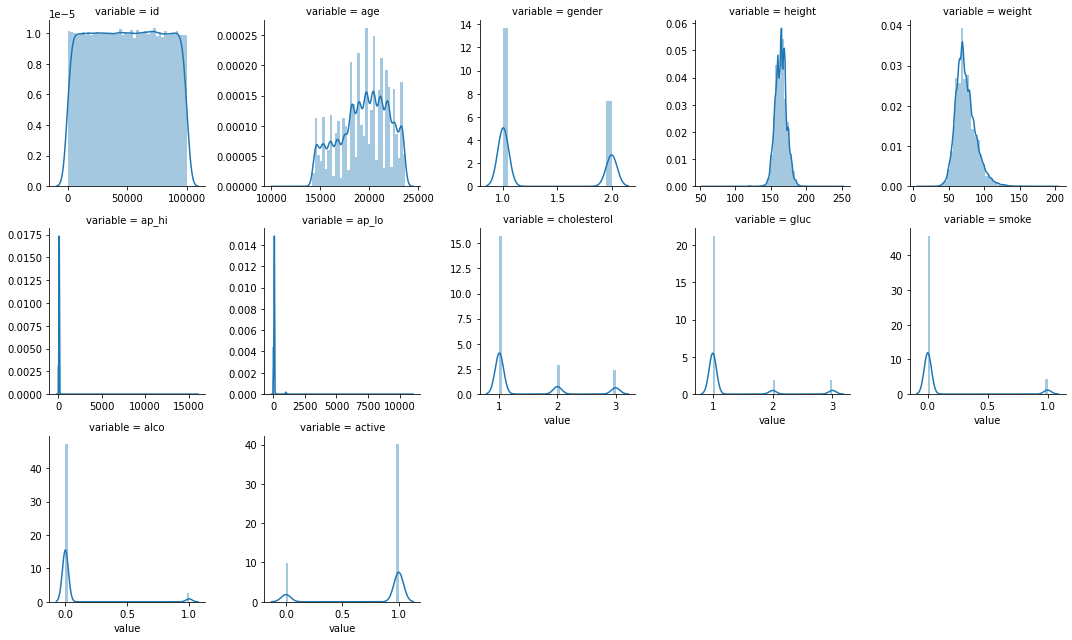

In [13]:
# visualize the distribution of each numerical feature

temp = pd.melt(data.drop('cardio',axis=1), value_vars= quan_data)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=5 , size=3.0, 
                     aspect=1.0,sharex=False, sharey=False)
grid.map(sns.distplot, "value")
plt.show()

#### Observations
- For the `weight`, `cholestrol`,`gluc`, `smoke`, `alco` are positively skewed.
- The `age`, `active`, and `Embarked_S` are negatively skewed.

<AxesSubplot:>

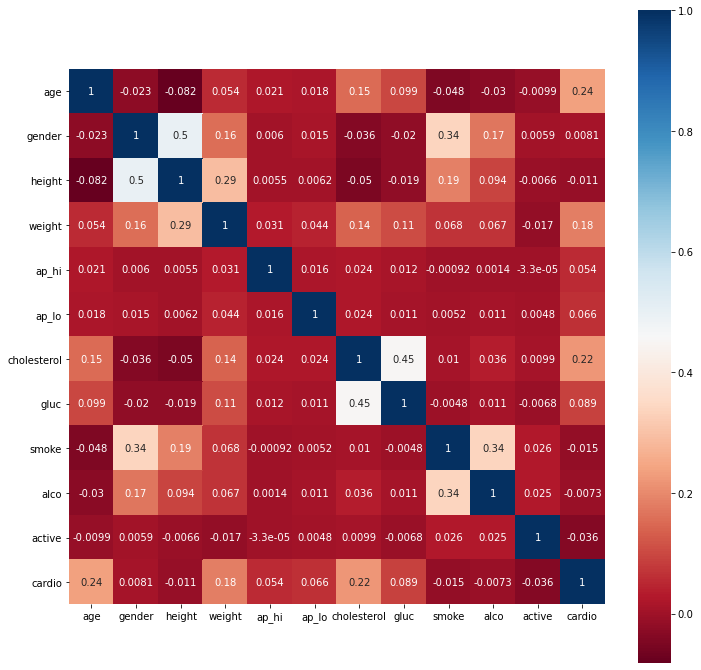

In [23]:
# selecting without ID
corr = data.iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap = 'RdBu')

#### List the features decendingly by correlation with cardio

In [27]:
cor_dict = corr['cardio'].to_dict()
del cor_dict['cardio']
print("List the features by their correlation with Survived:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the features by their correlation with Survived:

age: 	0.23815922744232326
cholesterol: 	0.22114727391225067
weight: 	0.1816595617986211
gluc: 	0.08930688732435302
ap_lo: 	0.06571869614919744
ap_hi: 	0.05447505392688467
active: 	-0.03565324811518795
smoke: 	-0.015485935661373308
height: 	-0.010821058331006026
gender: 	0.00810949191312318
alco: 	-0.007330231723206605


#### Observations
- The distribution of each variable with itself is shown on the diagonal
- To see patterns the observable pattern is that all the variables correlate with each other. On the bottom of the diagonal : we can see the negative correlations.
- On the top of the diagonal : the positive correlation is displayed.

### Uni-variate Analysis

#### 1. cardio Feature

<AxesSubplot:xlabel='cardio', ylabel='count'>

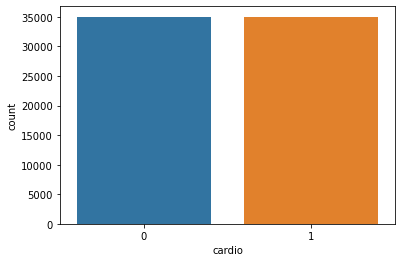

In [28]:
# Countplot counts the each category of value and plot that.
sns.countplot(data['cardio'],data = data)

- This is the target we want to predict and from the graph it shows that the data is balanced 

#### 2. cholesterol Feature

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

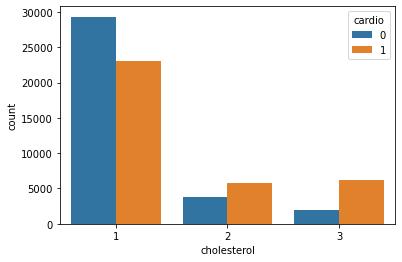

In [36]:
sns.countplot(data["cholesterol"],hue = data["cardio"],data = data)


- The `cholesterol` majority is `1` which means `normal`

#### 3. Glucose Feature

<AxesSubplot:xlabel='gluc', ylabel='count'>

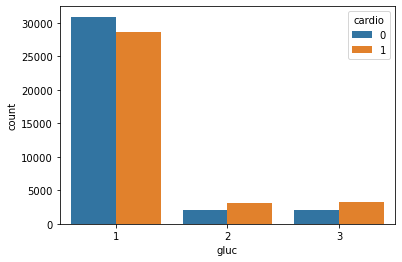

In [38]:
sns.countplot(data["gluc"],hue = data["cardio"],data = data)


- The `Glucose` majority is `1` which means `normal`

#### 4. smoke Feature

<AxesSubplot:xlabel='smoke', ylabel='count'>

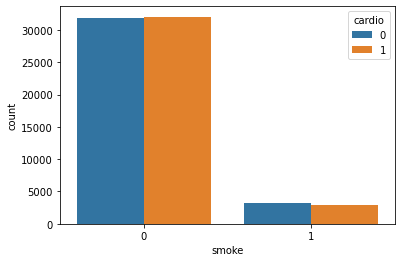

In [39]:
sns.countplot(data["smoke"],hue = data["cardio"],data = data)


- The majority of patients are `not smoking`

#### 4. Alcohol Feature

<AxesSubplot:xlabel='alco', ylabel='count'>

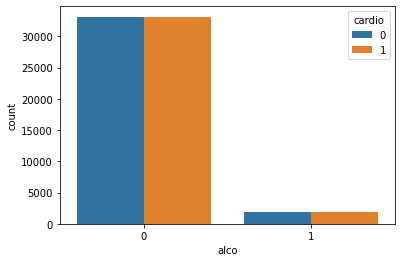

In [40]:
sns.countplot(data["alco"],hue = data["cardio"],data = data)


- The majority of patients are `not drinking`

#### 5. Active Feature

<AxesSubplot:xlabel='active', ylabel='count'>

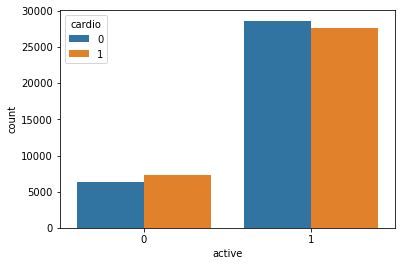

In [41]:
sns.countplot(data["active"],hue = data["cardio"],data = data)


- The majority of patients are `Active`

### Bi-variate Analysis

<Figure size 432x288 with 0 Axes>

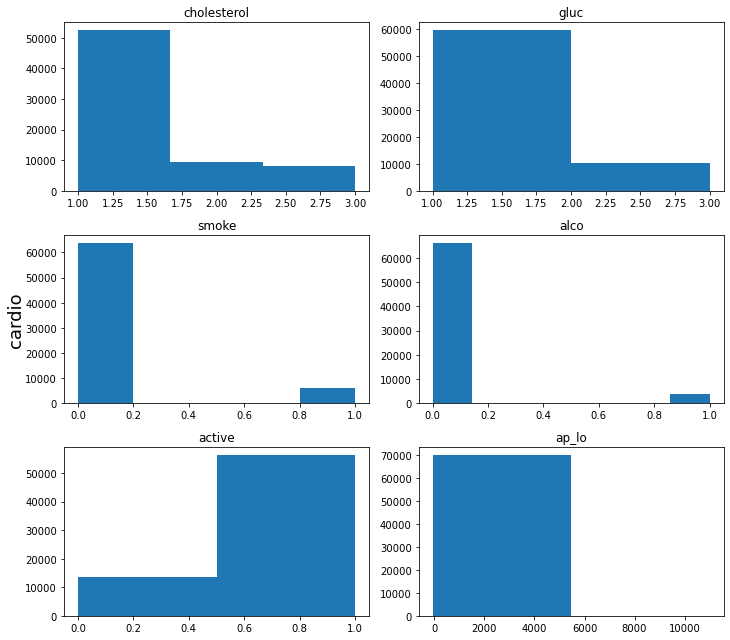

In [35]:
df_corr = data[con_cols].corr().transpose()
df_corr

### Cleaning

In [43]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [44]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

- The data has no null values so there is no need to do more cleaning. Also the types of data is correct.
- But for the `age` column we might need to convert it from age to years.

#### Convert age from days to years

In [74]:
#before
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [75]:
def convert_age(days):
    years = days // 365
    return years

data['age']=data['age'].apply(convert_age)

In [76]:
#after
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


## Conclustion

- In this simple understanding and syudying of data using the visulaization and doing some feature engineering the data is ready now for the modeling phase.